In [11]:
from pandas import read_csv,DataFrame,option_context
import csv
import os
import numpy as np
from matplotlib.pyplot import subplots,figure
import seaborn as sns
sns.set_context('talk',font_scale=1.4)
%matplotlib inline

In [2]:
#Load data from pdf converted file
data = read_csv("data//MBTA_Wages2014.txt",sep='\s{2,}',skiprows=2,engine='python',header=None,names=['Last Name','First Name','Descr','Title','ProjSal','Salary']).reset_index()

In [3]:
#Delete the index
del data['index']

In [7]:
#Drop the NA fields
data = data.dropna()

In [8]:
#Drop zero salary fields
data = data.loc[data['Salary']>0,:]
st = DataFrame(columns=['max','median','90th','subtot','num'],dtype=float)

In [9]:
def doplot(data,ind,saltype,ax):
    sal = data['Salary'][ind]
    (sal/1000).hist(ax=ax,bins=16)
    ax.set_xlim(0,260)
    ax.set_title('{}'.format(saltype),fontsize='large')
    return sal.max(), sal.median(), sal.quantile(.9),sal.sum(),ind.sum()

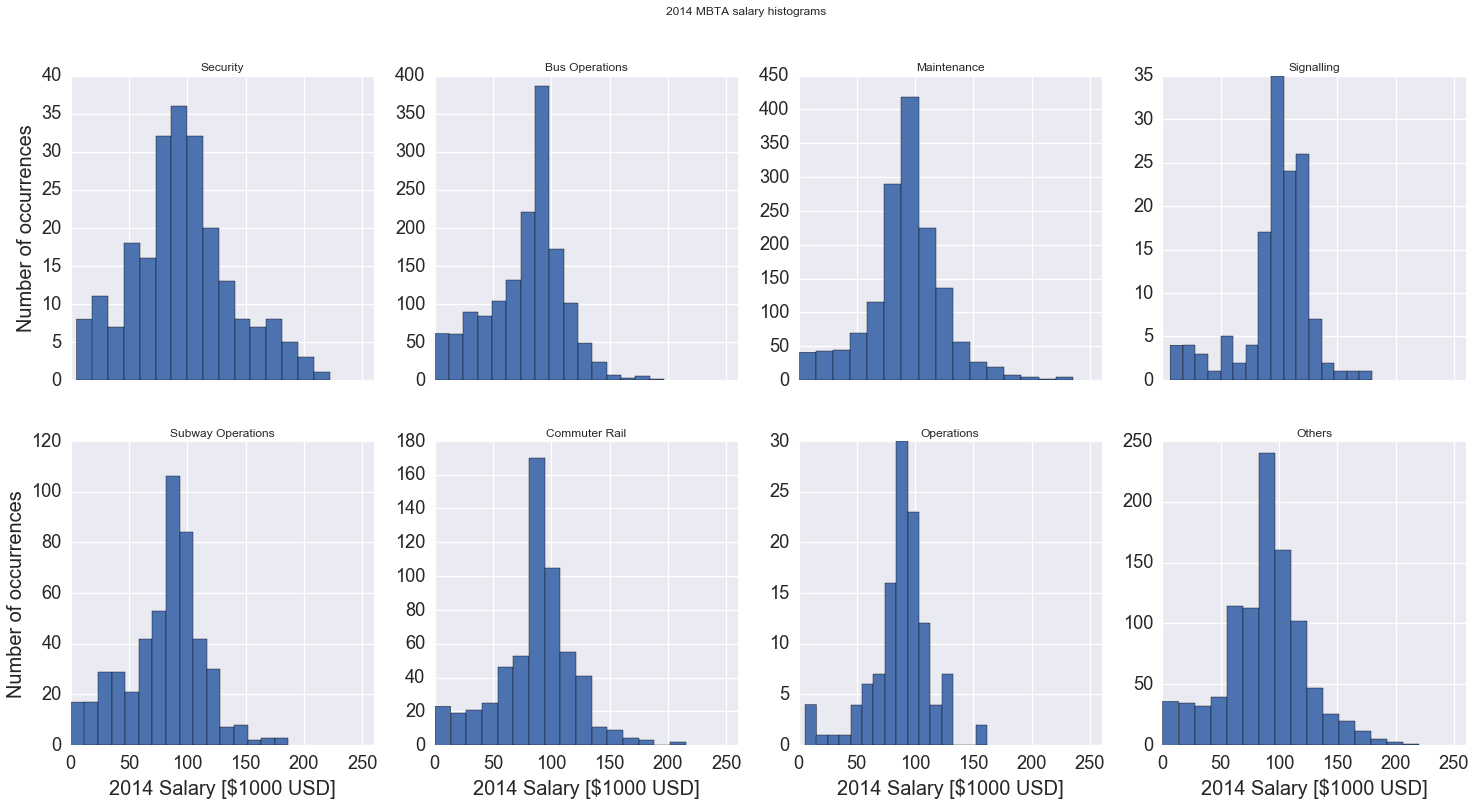

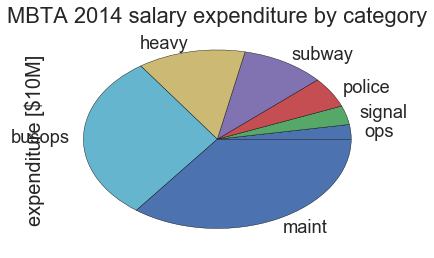

In [12]:
fg,ax = subplots(2,4,figsize=(25,12),sharex=True)

#Create folder Analysis_3 if not present
if not os.path.exists('Analysis_3') :
    os.mkdir('Analysis_3', 755 )

#Police
police = data.Descr.str.contains('741')
st.loc['police',:] = doplot(data,police,'Security',ax[0,0])



#Bus Operations
busops = data['Descr'].str.contains('Bus ') & data['Title'].str.contains('Operator')
st.loc['busops',:]=doplot(data,busops,'Bus Operations',ax[0,1])


#Maintenance
maint = (data['Descr'].str.contains('MOW ')   |
         data['Descr'].str.contains('Maint')  |
         data['Descr'].str.contains('Repair') |
         data['Title'].str.contains('Technician'))
st.loc['maint',:]=doplot(data,maint,'Maintenance',ax[0,2])



#Signaling staff
signals = data['Descr'].str.contains('Signals')
st.loc['signal',:]=doplot(data,signals,'Signalling',ax[0,3])



#subway operators
subway = data['Descr'].str.contains('LRail')
st.loc['subway',:]=doplot(data,subway,'Subway Operations',ax[1,0])



#Commuter Rail
comm = data['Descr'].str.contains('HRail')
st.loc['heavy',:] = doplot(data,comm,'Commuter Rail',ax[1,1])


#Operators
opstrn = data['Descr'].str.contains('OCC')
st.loc['ops',:] = doplot(data,opstrn,'Operations',ax[1,2])



#Sort by median salary
st.sort_values('median',ascending=False,inplace=True)



#Others
rest = ~(police | busops | maint | signals | subway | comm | opstrn)
st.loc['rest',:] = doplot(data,rest,'Others',ax[1,3])


#Plots
[a.set_ylabel('Number of occurrences') for a in ax[:,0]]
[a.set_xlabel('2014 Salary [$1000 USD]') for a in ax[1,:]]
fg.suptitle('2014 MBTA salary histograms',fontsize='large')
fg.savefig("Analysis_3/Analysis_3_part1.jpg", bbox_inches='tight')

#Plots
fg=figure()
ax=fg.gca()
(st.ix[:-1,'subtot']/1e8).sort_values().plot(kind='pie')
ax.set_ylabel('expenditure [$10M]')
ax.set_title('MBTA 2014 salary expenditure by category')
fg.savefig("Analysis_3/Analysis_3_part2.jpg", bbox_inches='tight')

st.to_csv("Analysis_3//Analysis_3.csv",index=False)